<a href="https://colab.research.google.com/github/Gabriel-Barboza-Carvajal/OptativaIntroduccionDatos/blob/main/Laboratorio_PHNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

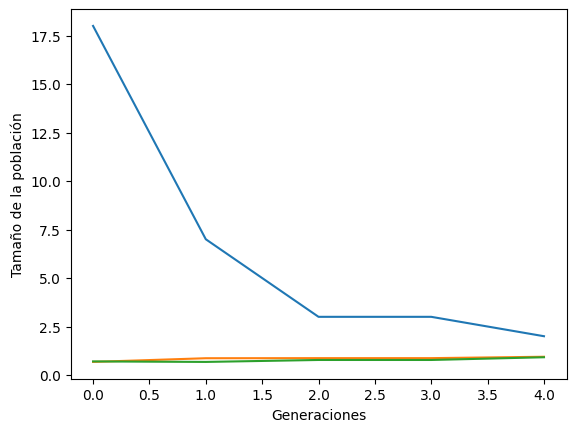

In [18]:
from random import random
import matplotlib.pyplot as plt
import numpy as np

# Definimos los parámetros de la simulación
tamano_poblacion = 200
cantidad_alimento = 100
prob_mutacion = 0.01
cantidad_iteraciones = 5

# Definimos la clase de los organismos
class Organismo:
    def __init__(self, prob_sobrevivir, velocidad_reproduccion):
      self.prob_sobrevivir=prob_sobrevivir
      self.velocidad_reproduccion=velocidad_reproduccion
    
    def reproducirse(self):
      if random()<self.velocidad_reproduccion:
        return Organismo(self.prob_sobrevivir,self.velocidad_reproduccion)
      else:
        return None
    
    def sobrevivir(self,cantidad_alimiento):
      prob_sobrevivir_ajustada=self.prob_sobrevivir*(cantidad_alimento/100.0)
      if random()<prob_sobrevivir_ajustada:
        return True
      else:
        return False

    # Definimos la función para mutar un organismo
def mutar_organismo(organismo,prob_mutacion):
    if random()<prob_mutacion:
      return Organismo(organismo.prob_sobrevivir + (random()*0.2 - 0.1), organismo.velocidad_reproduccion + (random()*0.2 - 0.1))
    else:
      return organismo
    # Creamos la población inicial
    poblacion = [Organismo(random(),random()) for i in range(tamano_poblacion)]

    #creamos las listas para alacenar la evolución de la población
poblacion_tamano=[]
poblacion_promedio_sobrevivencia=[]
polacion_promedio_velocidad=[]

  # Ejecutamos la simulación
for i in range(cantidad_iteraciones):

  #Calculamos la cantidad de alimento disponible
  cantidad_alimento = 100 - i 
      
  #Filtramos los organismo que sobreviven y se reproducen
  poblacion = [organismo.reproducirse() for organismo in poblacion if organismo.sobrevivir(cantidad_alimento)]
  poblacion = [organismo for organismo in poblacion if organismo is not None]

  #Mutamos algunos organismo al azar
  poblacion = [mutar_organismo(organismo, prob_mutacion) for organismo in poblacion]

  #Almacenamos la evolución de la poblacion
  poblacion_tamano.append(len(poblacion))
  poblacion_promedio_sobrevivencia.append(np.mean([organismo.prob_sobrevivir for organismo in poblacion]))
  polacion_promedio_velocidad.append(np.mean([organismo.velocidad_reproduccion for organismo in poblacion]))

# Graficamos la evolucion de la poblacion

plt.figure()
plt.plot(poblacion_tamano,label='Tamaño de la población')
plt.plot(poblacion_promedio_sobrevivencia, label="Probabilidad de sobrevivencia promedio")
plt.plot(polacion_promedio_velocidad, label="velocidad de reproducción promedio")
plt.xlabel("Generaciones")
plt.ylabel("Tamaño de la población")
plt
